In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.ion()

import prepare as p

#  Exercise

**Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.**

**For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.**

###  - Store

In [54]:
df = pd.read_csv('df_complete.csv')


In [55]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     913000 non-null  int64  
 1   item_brand     913000 non-null  object 
 2   item_id        913000 non-null  int64  
 3   item_name      913000 non-null  object 
 4   item_price     913000 non-null  float64
 5   item_upc12     913000 non-null  int64  
 6   item_upc14     913000 non-null  int64  
 7   sale_amount    913000 non-null  float64
 8   sale_date      913000 non-null  object 
 9   sale_id        913000 non-null  int64  
 10  store          913000 non-null  int64  
 11  store_address  913000 non-null  object 
 12  store_city     913000 non-null  object 
 13  store_state    913000 non-null  object 
 14  store_zipcode  913000 non-null  int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 104.5+ MB


In [56]:
#use my function
df = p.prep_sales(df, 'sale_date')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_brand     913000 non-null  object 
 1   item_id        913000 non-null  int64  
 2   item_name      913000 non-null  object 
 3   item_price     913000 non-null  float64
 4   item_upc12     913000 non-null  int64  
 5   item_upc14     913000 non-null  int64  
 6   sale_amount    913000 non-null  float64
 7   sale_id        913000 non-null  int64  
 8   store          913000 non-null  int64  
 9   store_address  913000 non-null  object 
 10  store_city     913000 non-null  object 
 11  store_state    913000 non-null  object 
 12  store_zipcode  913000 non-null  int64  
 13  month          913000 non-null  int64  
 14  day_of_week    913000 non-null  object 
 15  sales_total    913000 non-null  float64
dtypes: float64(3), int64(7), obj

## Split


#### - Percentage-Based

In [59]:
df.shape

(913000, 16)

In [75]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

In [76]:
train.head()

,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,sale_amount,sale_id,store,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,26.0,295813,3,2118 Fredericksburg Rdj,San Antonio,TX,78201,1,Tuesday,30.16
2013-01-01 00:00:00+00:00,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,32.0,125995,10,8503 NW Military Hwy,San Antonio,TX,78231,1,Tuesday,308.48
2013-01-01 00:00:00+00:00,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,45.0,314073,3,2118 Fredericksburg Rdj,San Antonio,TX,78201,1,Tuesday,197.55
2013-01-01 00:00:00+00:00,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,34.0,332333,3,2118 Fredericksburg Rdj,San Antonio,TX,78201,1,Tuesday,25.16


In [ ]:
plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

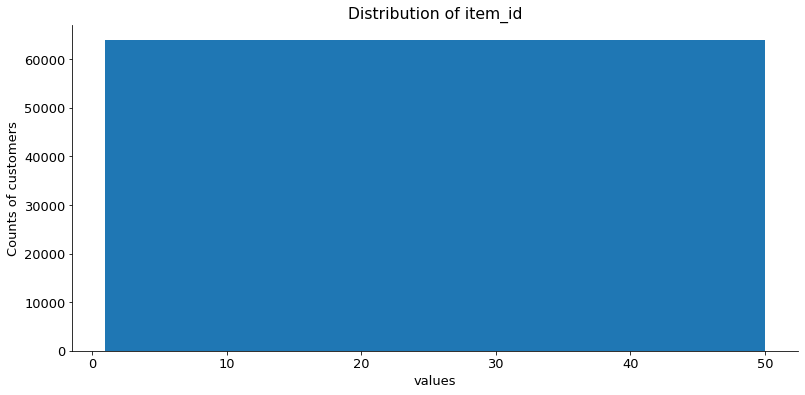

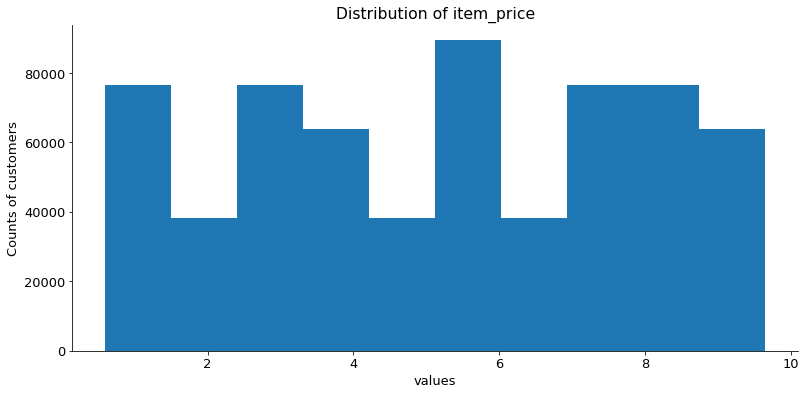

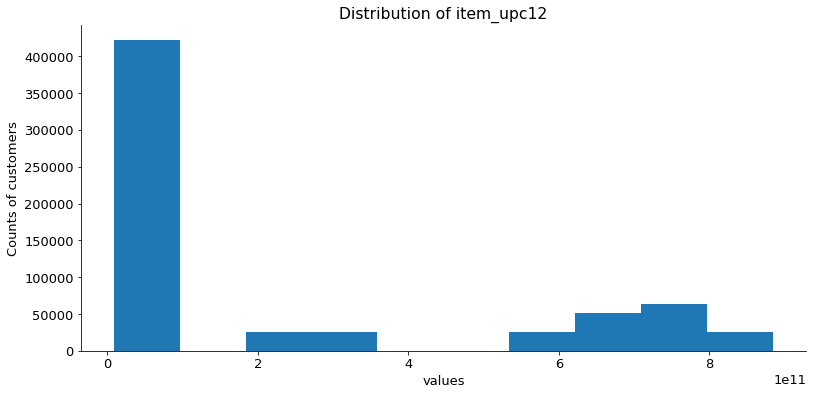

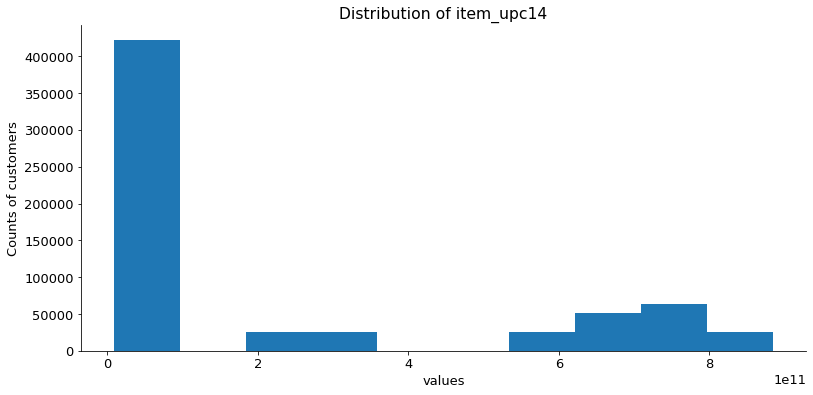

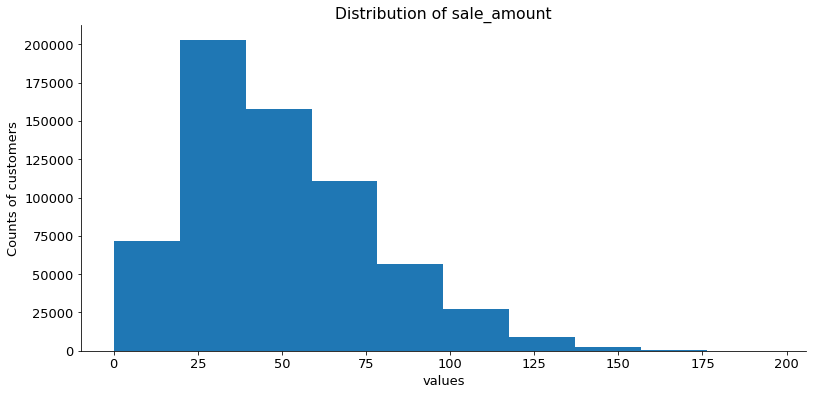

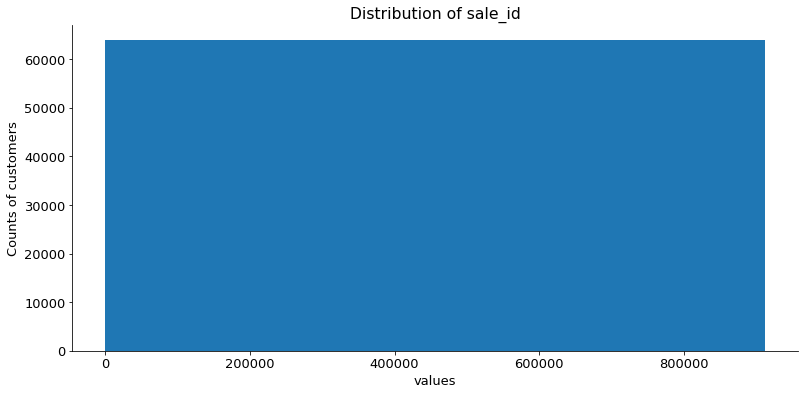

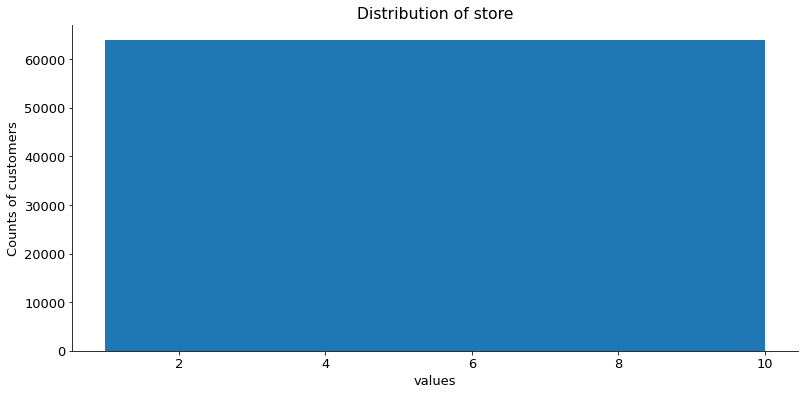

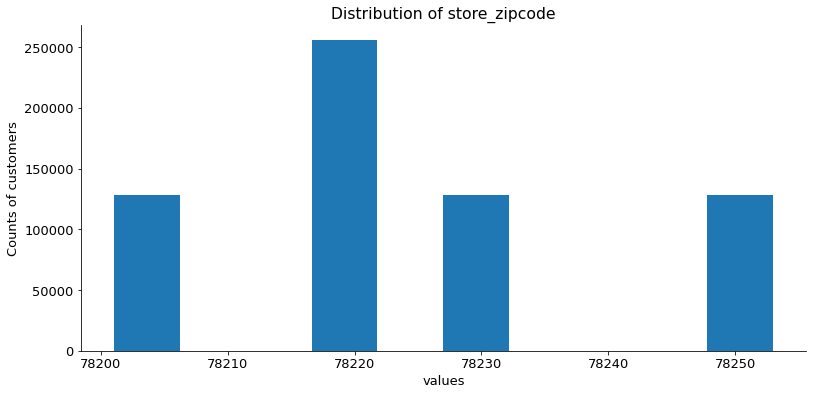

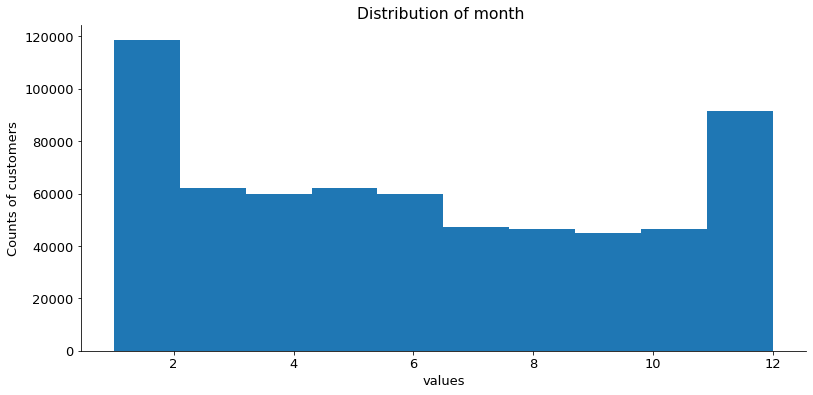

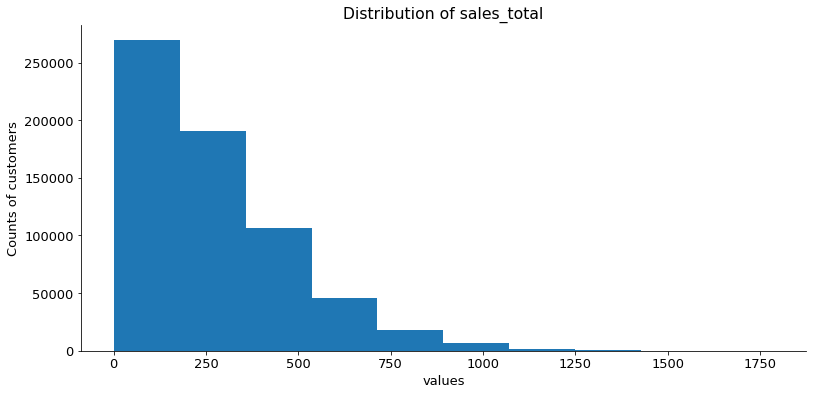

In [63]:
p.distribution(train)

In [67]:
train.head()

,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,sale_amount,sale_id,store,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,26.0,295813,3,2118 Fredericksburg Rdj,San Antonio,TX,78201,1,Tuesday,30.16
2013-01-01 00:00:00+00:00,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,32.0,125995,10,8503 NW Military Hwy,San Antonio,TX,78231,1,Tuesday,308.48
2013-01-01 00:00:00+00:00,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,45.0,314073,3,2118 Fredericksburg Rdj,San Antonio,TX,78201,1,Tuesday,197.55
2013-01-01 00:00:00+00:00,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,34.0,332333,3,2118 Fredericksburg Rdj,San Antonio,TX,78201,1,Tuesday,25.16


In [64]:
#plotting defaults:
plt.rc('figure', figsize=(13, 6))
plt.rc('axes.spines', top=False, right=False)
plt.rc('font', size=13)

<AxesSubplot:xlabel='sale_date'>

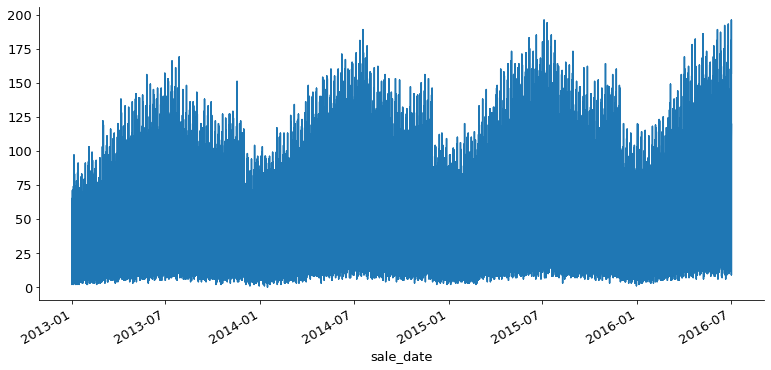

In [69]:
train.sale_amount.plot()

<AxesSubplot:xlabel='sale_date'>

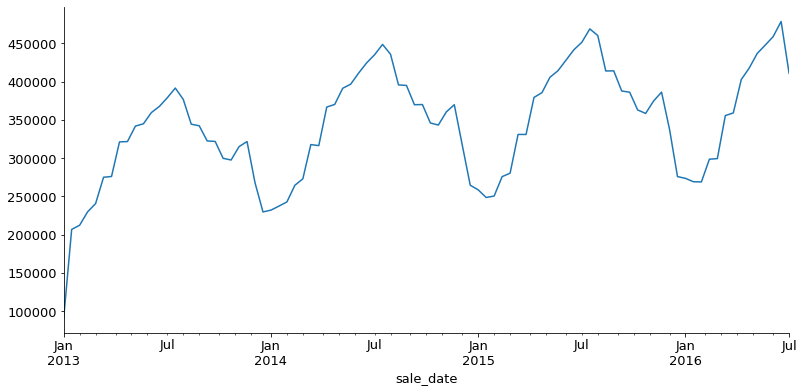

In [70]:
#sum of sales_total
train.sale_amount.resample('2W').sum().plot()

<AxesSubplot:xlabel='sale_date'>

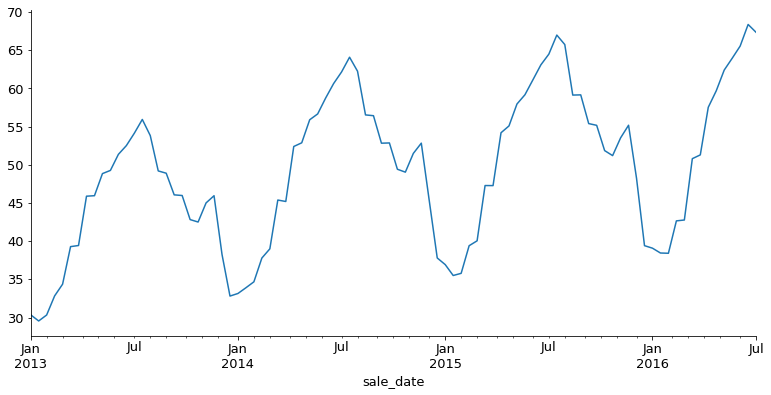

In [71]:
#avg of sale_amount
train.sale_amount.resample('2W').mean().plot()

<AxesSubplot:ylabel='sale_date'>

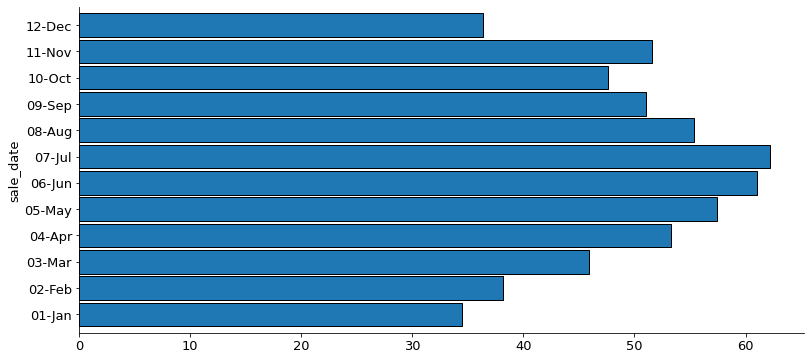

In [73]:
# s.groupby(s.index.month).mean().plot.bar()
# demonstrating one of the above techniques
train.sale_amount.groupby(train.index.strftime('%m-%b')).mean().plot.barh(width=.9, ec='black')

### Differences

In [74]:
train['sale_amnt_diff()'] = train.sale_amount.diff()

KeyboardInterrupt: 

In [ ]:
train.head(3)

In [ ]:
#let's see the montly change in sale_amount
train.sale_amount.resample('M').mean().diff().plot()

<AxesSubplot:xlabel='sale_date'>

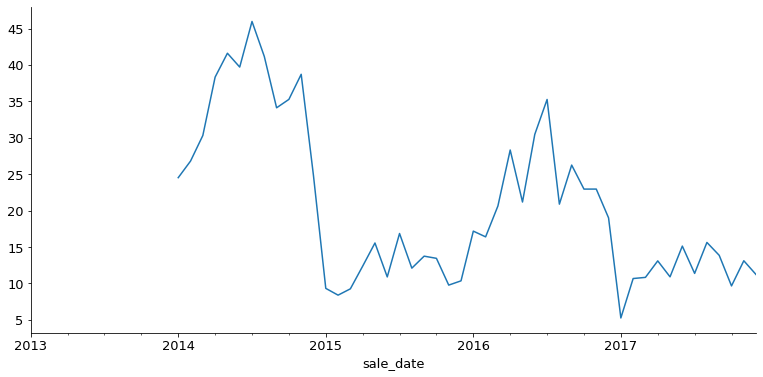

In [23]:
#the difference between each month and the same month the previous year 
train.sale_amount.resample('M').mean().diff(12).plot()

### Shift

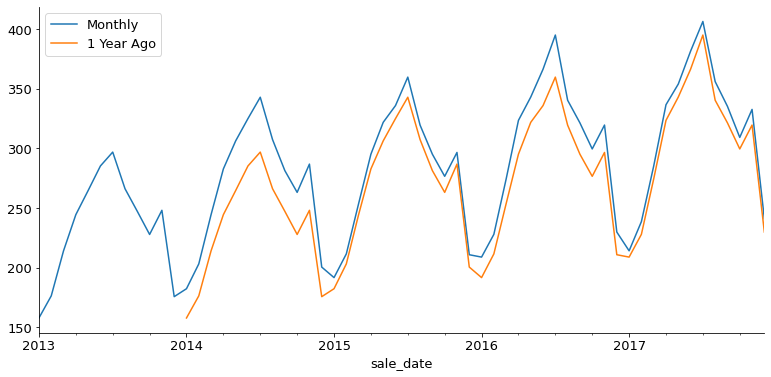

In [26]:
#We could use .shift to overlay the sales_total for the same month in the previous year:
ax = train.sale_amount.resample('M').mean().plot(label='Monthly')
train.sale_amount.resample('M').mean().shift(12).plot(label='1 Year Ago', ax=ax)
ax.legend()

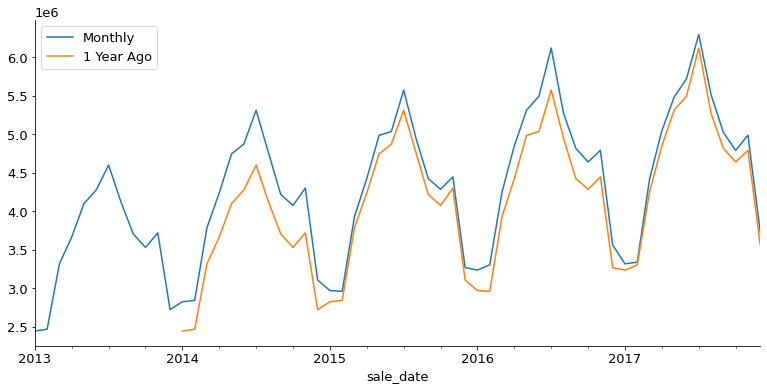

In [27]:
#We could use .shift to overlay the sales_total for the same month in the previous year:
ax = train.sale_amount.resample('M').sum().plot(label='Monthly')
train.sale_amount.resample('M').sum().shift(12).plot(label='1 Year Ago', ax=ax)
ax.legend()

### Customizing Ticks

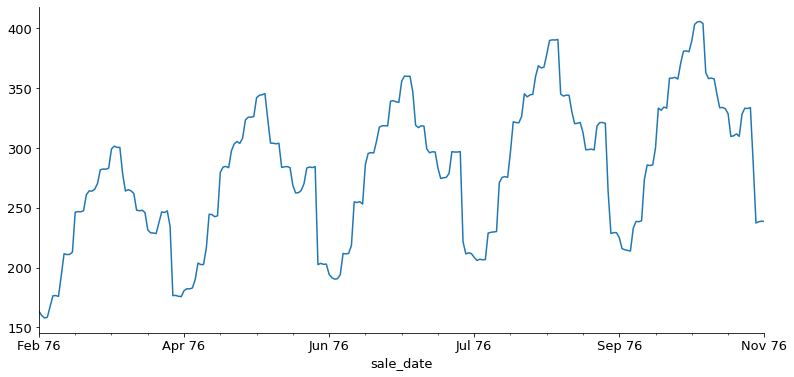

In [28]:
# Using a major formatter:
ax = train.sale_amount.resample('W').mean().plot()
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%b %y'))

### Seasonality


<AxesSubplot:xlabel='t', ylabel='t + 1'>

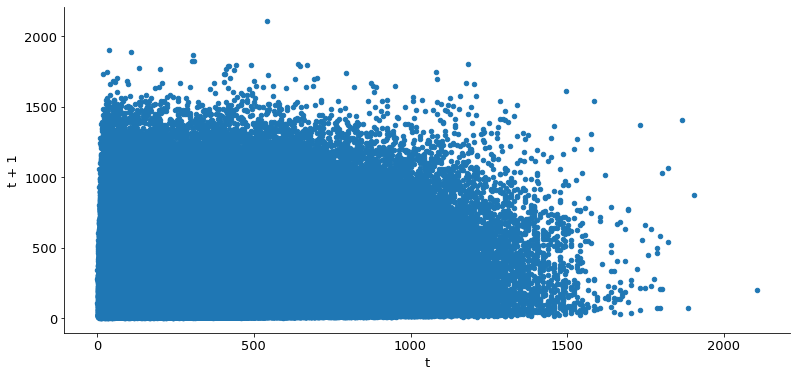

In [30]:
# We concatenate the series with itself shifted by 1 and then make a scatter plot of the two columns
pd.concat([train.sale_amount.rename('t'), train.sale_amount.shift().rename('t + 1')], axis=1).plot.scatter(y='t + 1', x='t')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 7)'>

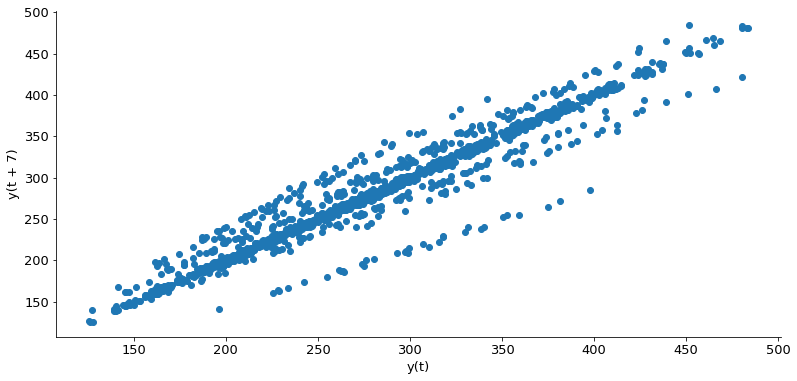

In [31]:
# note here we are using a pandas built-in to make our lag plot
pd.plotting.lag_plot(train.sale_amount.resample('D').mean(), 7)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

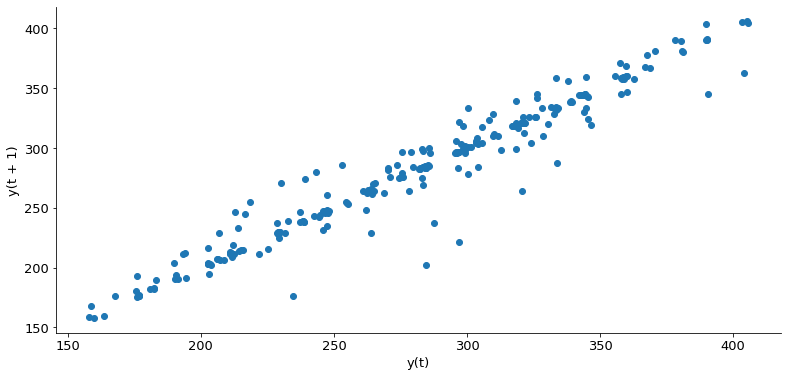

In [32]:
pd.plotting.lag_plot(train.sale_amount.resample('W').mean(), 1)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

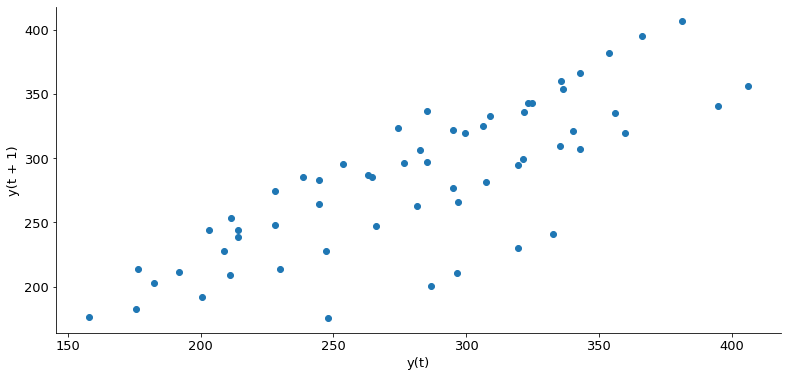

In [33]:
pd.plotting.lag_plot(train.sale_amount.resample('M').mean(), 1)

In [35]:
def correlation(s, lag):
    return pd.concat([s, s.shift(lag)], axis=1).dropna().corr().iloc[0, 1]

In [45]:
# Here we construct a series with index being each number from 1 to 365, and the values being the
# autocorrelation for that value of lag
autocorr = pd.Series({lag: correlation(train.sale_amount.resample('D').mean(), lag) for lag in range(1, 365)})
autocorr

1      0.757257
2      0.675474
3      0.597451
4      0.592661
5      0.660747
         ...   
360    0.546006
361    0.552426
362    0.634493
363    0.720162
364    0.979967
Length: 364, dtype: float64

<AxesSubplot:>

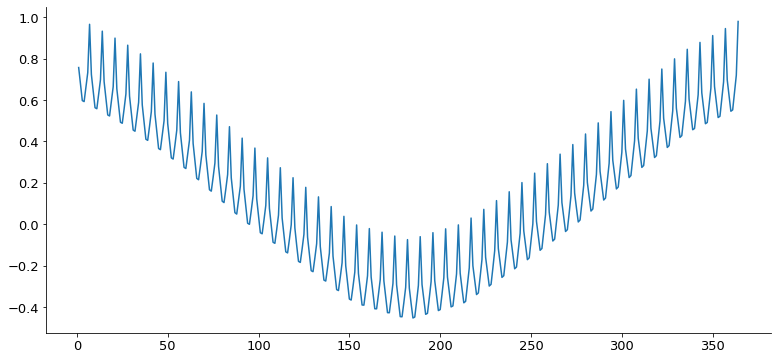

In [46]:
autocorr.plot()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

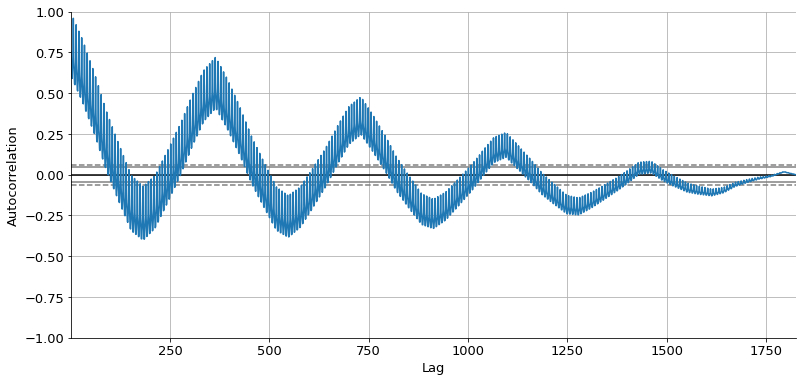

In [47]:
pd.plotting.autocorrelation_plot(train.sale_amount.resample('D').mean())